## Module 1: Dataset Setup and Image Labeling

Starting dataset inspection...
Found classes: ['clear face', 'darkspots', 'puffy eyes', 'wrinkles']
clear face: 97 images
darkspots: 102 images
puffy eyes: 101 images
wrinkles: 100 images
Total images: 400


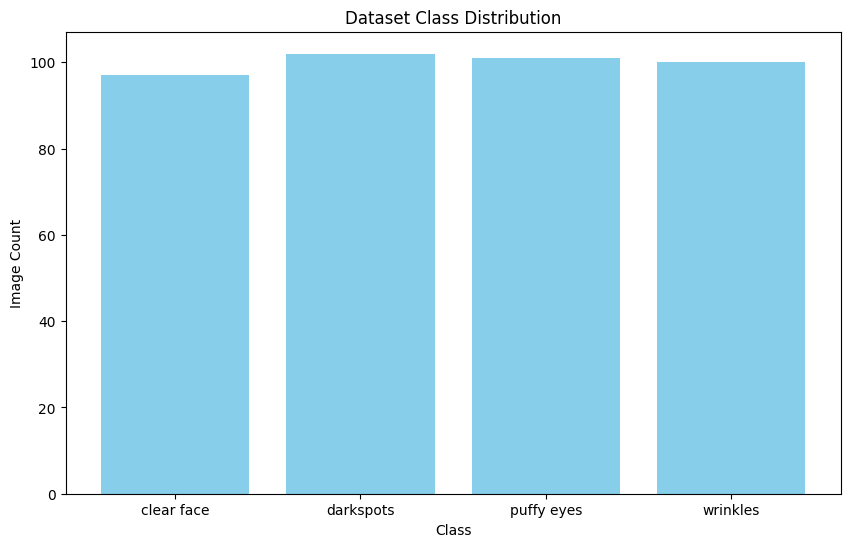


 Module 1 tasks completed.


In [20]:
import os
import matplotlib.pyplot as plt

# Path to the main dataset folder
DATASET_DIR = 'dataset'

# Stores image count per class
class_counts = {}

# Get all class folders inside the dataset
classes = [d for d in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, d))]

print("Starting dataset inspection...")
print(f"Found classes: {classes}")

# Count images for each class
for class_name in classes:
    class_path = os.path.join(DATASET_DIR, class_name)
    
    # Count files 
    images_in_class = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    image_count = len(images_in_class)
    
    class_counts[class_name] = image_count
    print(f"{class_name}: {image_count} images")

# Total images in dataset
total_images = sum(class_counts.values())
print(f"Total images: {total_images}")

# Plot class distribution
if class_counts:
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.title('Dataset Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Image Count')
    plt.show()

print("\n Module 1 tasks completed.")


## Module 2: Image Preprocessing and Augmentation

Creating data generators...
Found 319 images belonging to 4 classes.
Found 78 images belonging to 4 classes.

Generators ready.
Training images: 319
Validation images: 78

Showing a batch of augmented samples...


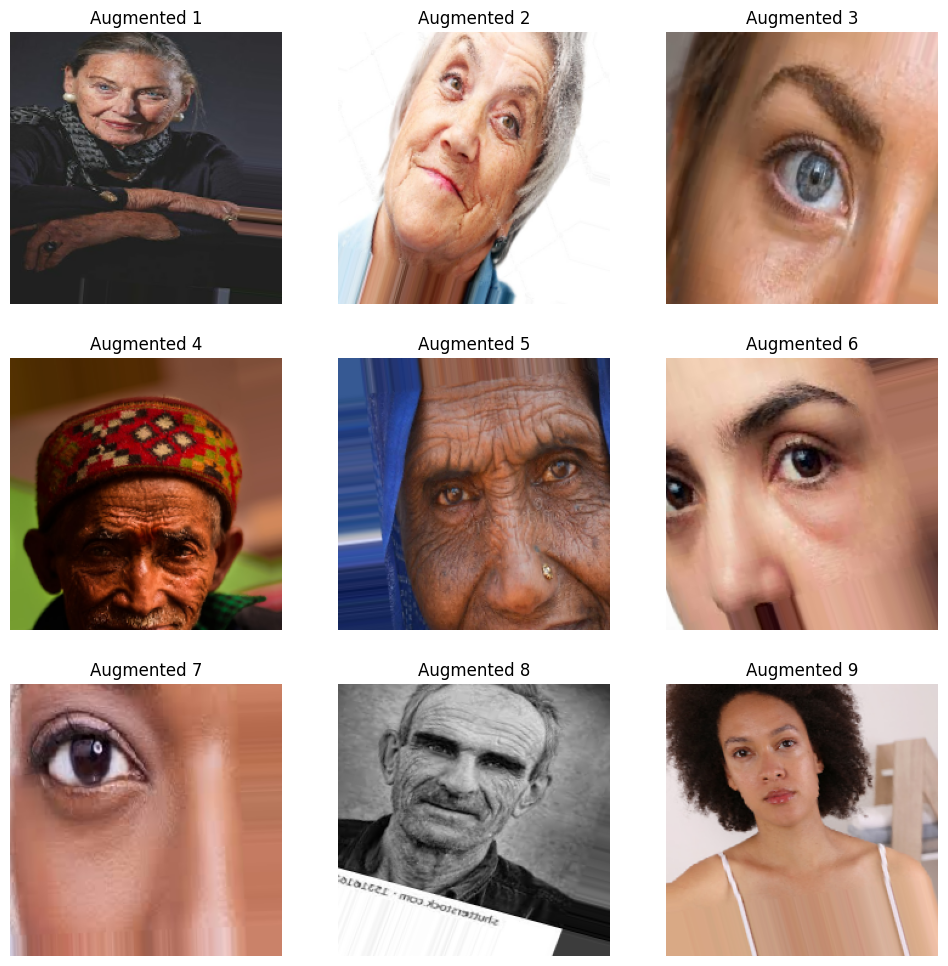


 Module 2 tasks completed.


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset setup
DATASET_DIR = 'dataset'
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data generator with normalization + basic augmentation
datagen = ImageDataGenerator(
    rescale=1./255,        # scale pixel values to [0,1]
    rotation_range=20,     # random rotations
    horizontal_flip=True,  # random horizontal flips
    zoom_range=0.2,        # random zoom
    width_shift_range=0.2, # random shift
    height_shift_range=0.2,# random shift
    validation_split=0.2   # 20% for validation
)

print("Creating data generators...")

# Training data generator
train_generator = datagen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    directory=DATASET_DIR,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("\nGenerators ready.")
print(f"Training images: {train_generator.n}")
print(f"Validation images: {validation_generator.n}")

# Quick check: visualize some augmented images
print("\nShowing a batch of augmented samples...")

images_batch, _ = next(train_generator)

plt.figure(figsize=(12, 12))
for i in range(min(9, BATCH_SIZE)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images_batch[i])
    plt.title(f"Augmented {i+1}")
    plt.axis("off")

plt.show()

print("\n Module 2 tasks completed.")


## Module 3: Model Training with 

### EfficientNetB0

Building the model with EfficientNetB0...
Compiling the model...
Setting up callbacks...

Starting model training...


d:\AI_DermalScan\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2062 - loss: 1.5472

10/10 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.2163 - loss: 1.5795 - val_accuracy: 0.2436 - val_loss: 1.3869 - learning_rate: 0.0010
Epoch 2/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.2727 - loss: 1.4631 - val_accuracy: 0.2436 - val_loss: 1.3868 - learning_rate: 0.0010
Epoch 3/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2705 - loss: 1.4390

10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2602 - loss: 1.4322 - val_accuracy: 0.2564 - val_loss: 1.3861 - learning_rate: 0.0010
Epoch 4/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.2445 - loss: 1.4415 - val_accuracy: 0.2564 - val_loss: 1.3863 - learning_rate: 0.0010
Epoch 5/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.2696 - loss: 1.4176 - val_accuracy: 0.2564 - val_loss: 1.3866 - learning_rate: 0.0010
Epoch 6/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.2790 - loss: 1.4250 - val_accuracy: 0.2564 - val_loss: 1.3870 - learning_rate: 0.0010
Epoch 7/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.2288 - loss: 1.4088 - val_accuracy: 0.2564 - val_loss: 1.3867 - learning_rate: 0.0010
Epoch 8/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2853 - loss: 1.4077 - val_accuracy: 0.2564 - val_loss: 1.3864 - learning_rate: 2.0000e-04
Epoch 9/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2539 - loss: 1.3977 - val_accuracy: 0.2564 

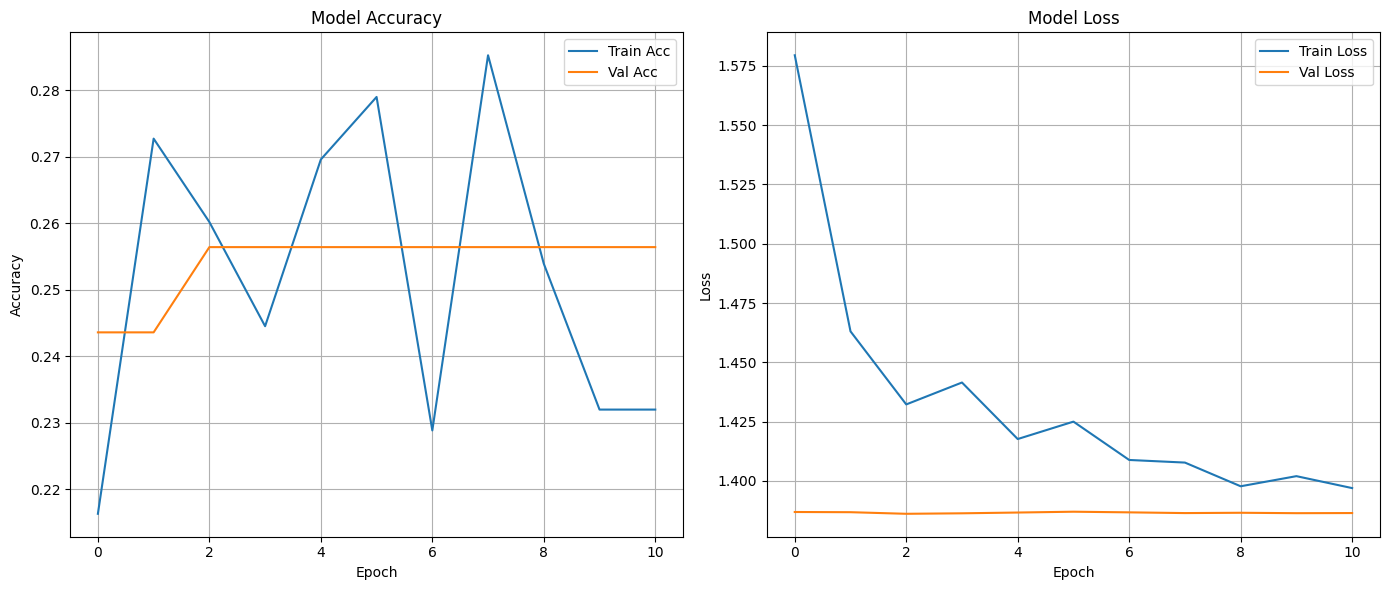


Training complete. Best model saved as 'EfficientNetB0_best_model.h5'.


In [22]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# 1. Build the model
print("Building the model with EfficientNetB0...")

base_model = EfficientNetB0(
    weights=None,
    include_top=False,
    input_shape=(224, 224, 3)
)
# Manually load the pre-trained weights
base_model.load_weights('weights/efficientnetb0_notop.h5')

# Unfreeze only the last 30 layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Create the full model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# 2. Compile the model
print("Compiling the model...")
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Set up the callbacks
print("Setting up callbacks...")
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=8,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=4
    ),
    ModelCheckpoint(
        'EfficientNetB0_best_model.h5',
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )
]

# 4. Train the model
print("\nStarting model training...")
history = model.fit(
    train_generator,
    epochs=75,
    validation_data=validation_generator,
    callbacks=callbacks
)

# 5. Plot training progress
print("\nPlotting training results...")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nTraining complete. Best model saved as 'EfficientNetB0_best_model.h5'.")

### MobileNetV2

Building the model with MobileNetV2...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Compiling the model...
Setting up callbacks...

Starting model training...
Epoch 1/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3576 - loss: 1.6664

10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.4420 - loss: 1.3917 - val_accuracy: 0.5513 - val_loss: 1.2875 - learning_rate: 0.0010
Epoch 2/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6400 - loss: 0.9289

10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6520 - loss: 0.9075 - val_accuracy: 0.6667 - val_loss: 1.0955 - learning_rate: 0.0010
Epoch 3/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7774 - loss: 0.6380 - val_accuracy: 0.6410 - val_loss: 1.6099 - learning_rate: 0.0010
Epoch 4/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7904 - loss: 0.5175

10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7806 - loss: 0.5047 - val_accuracy: 0.6923 - val_loss: 1.8306 - learning_rate: 0.0010
Epoch 5/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8683 - loss: 0.4087 - val_accuracy: 0.6538 - val_loss: 4.8533 - learning_rate: 0.0010
Epoch 6/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8840 - loss: 0.3671 - val_accuracy: 0.5897 - val_loss: 6.4317 - learning_rate: 0.0010
Epoch 7/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9060 - loss: 0.2751 - val_accuracy: 0.6154 - val_loss: 5.7095 - learning_rate: 2.0000e-04
Epoch 8/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9216 - loss: 0.2236 - val_accuracy: 0.6795 - val_loss: 4.8716 - learning_rate: 2.0000e-04
Epoch 9/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9310 - loss: 0.1958 - val_accuracy: 0.6795 - val_loss: 4.4686 - learning_rate: 2.0000e-04
Epoch 10/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9279 - loss: 0.2003 - val_accuracy

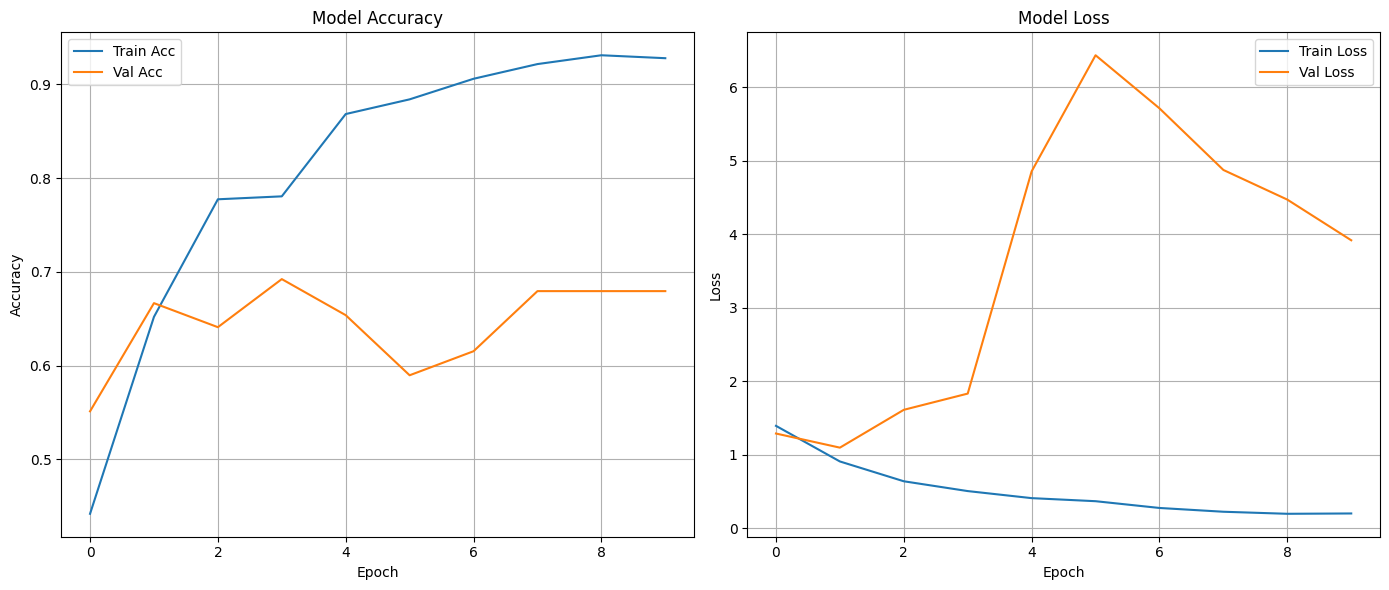


Training complete. Best model saved as 'MobileNetV2_best_model.h5'.


In [24]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# 1. Build the model
print("Building the model with MobileNetV2...")

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Unfreeze only the last 30 layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Create the full model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# 2. Compile the model
print("Compiling the model...")
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Set up the callbacks
print("Setting up callbacks...")
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=8,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=4
    ),
    ModelCheckpoint(
        'MobileNetV2_best_model.h5',
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )
]

# 4. Train the model
print("\nStarting model training...")
history = model.fit(
    train_generator,
    epochs=75,
    validation_data=validation_generator,
    callbacks=callbacks
)

# 5. Plot training progress
print("\nPlotting training results...")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nTraining complete. Best model saved as 'MobileNetV2_best_model.h5'.")

###  InceptionV3

Building the model with InceptionV3...
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
Compiling the model...
Setting up callbacks...

Starting model training...
Epoch 1/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4252 - loss: 1.4081

10/10 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.4765 - loss: 1.2836 - val_accuracy: 0.6154 - val_loss: 1.6399 - learning_rate: 0.0010
Epoch 2/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6395 - loss: 0.9905 - val_accuracy: 0.6154 - val_loss: 1.4160 - learning_rate: 0.0010
Epoch 3/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6922 - loss: 0.7601

10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7210 - loss: 0.7372 - val_accuracy: 0.7051 - val_loss: 0.9375 - learning_rate: 0.0010
Epoch 4/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7294 - loss: 0.7425

10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7335 - loss: 0.6799 - val_accuracy: 0.7821 - val_loss: 0.8691 - learning_rate: 0.0010
Epoch 5/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7680 - loss: 0.6116 - val_accuracy: 0.7179 - val_loss: 0.9792 - learning_rate: 0.0010
Epoch 6/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8237 - loss: 0.5767

10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.8150 - loss: 0.5523 - val_accuracy: 0.8077 - val_loss: 0.8015 - learning_rate: 0.0010
Epoch 7/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8877 - loss: 0.3961

10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8746 - loss: 0.3976 - val_accuracy: 0.8333 - val_loss: 0.6043 - learning_rate: 0.0010
Epoch 8/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8495 - loss: 0.3834 - val_accuracy: 0.7692 - val_loss: 0.9021 - learning_rate: 0.0010
Epoch 9/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8715 - loss: 0.3334 - val_accuracy: 0.8077 - val_loss: 1.0439 - learning_rate: 0.0010
Epoch 10/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9279 - loss: 0.2695 - val_accuracy: 0.8205 - val_loss: 0.9746 - learning_rate: 0.0010
Epoch 11/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9342 - loss: 0.2402 - val_accuracy: 0.7692 - val_loss: 1.5120 - learning_rate: 0.0010
Epoch 12/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9185 - loss: 0.1977 - val_accuracy: 0.8333 - val_loss: 1.0993 - learning_rate: 2.0000e-04
Epoch 13/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9185 - loss: 0.3310 - val_accuracy: 0.8

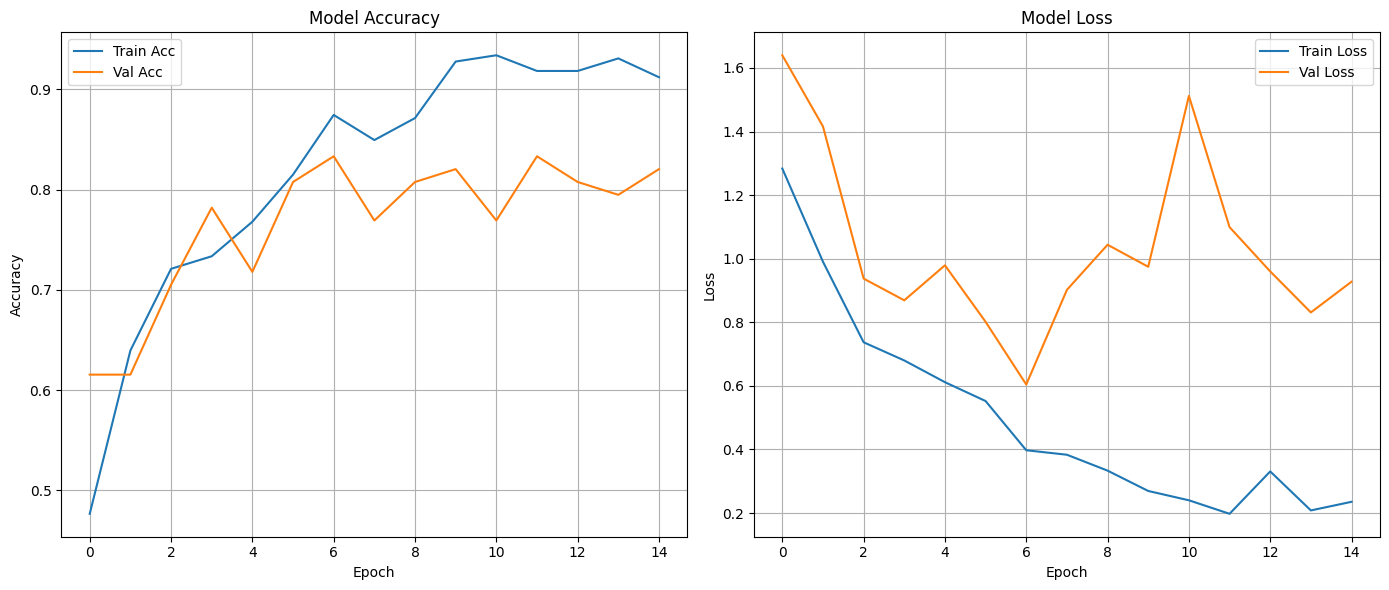


Training complete. Best model saved as 'InceptionV3_best_model.h5'.


In [23]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# 1. Build the model
print("Building the model with InceptionV3...")

base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Unfreeze only the last 30 layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Create the full model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# 2. Compile the model
print("Compiling the model...")
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Set up the callbacks
print("Setting up callbacks...")
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=8,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=4
    ),
    ModelCheckpoint(
        'InceptionV3_best_model.h5',
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )
]

# 4. Train the model
print("\nStarting model training...")
history = model.fit(
    train_generator,
    epochs=75,
    validation_data=validation_generator,
    callbacks=callbacks
)

# 5. Plot training progress
print("\nPlotting training results...")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nTraining complete. Best model saved as 'InceptionV3_best_model.h5'.")

### DenseNet121

Building the model with DenseNet121...
Compiling the model...
Setting up callbacks...

Starting model training...
Epoch 1/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3231 - loss: 1.6928

10/10 ━━━━━━━━━━━━━━━━━━━━ 97s 7s/step - accuracy: 0.3323 - loss: 1.6214 - val_accuracy: 0.6923 - val_loss: 1.0724 - learning_rate: 0.0010
Epoch 2/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.4420 - loss: 1.2935 - val_accuracy: 0.5897 - val_loss: 0.9695 - learning_rate: 0.0010
Epoch 3/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4855 - loss: 1.1813

10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.5235 - loss: 1.1011 - val_accuracy: 0.7179 - val_loss: 0.8373 - learning_rate: 0.0010
Epoch 4/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6362 - loss: 0.8808

10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.6458 - loss: 0.8959 - val_accuracy: 0.7821 - val_loss: 0.6623 - learning_rate: 0.0010
Epoch 5/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.6959 - loss: 0.8347 - val_accuracy: 0.7692 - val_loss: 0.5999 - learning_rate: 0.0010
Epoch 6/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7837 - loss: 0.6492 - val_accuracy: 0.7821 - val_loss: 0.5830 - learning_rate: 0.0010
Epoch 7/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.7931 - loss: 0.6334 - val_accuracy: 0.7692 - val_loss: 0.6694 - learning_rate: 0.0010
Epoch 8/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.8056 - loss: 0.5443 - val_accuracy: 0.7692 - val_loss: 0.6546 - learning_rate: 0.0010
Epoch 9/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8353 - loss: 0.4386

10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.8182 - loss: 0.5030 - val_accuracy: 0.8077 - val_loss: 0.6847 - learning_rate: 0.0010
Epoch 10/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8371 - loss: 0.3857

10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.8464 - loss: 0.4105 - val_accuracy: 0.8205 - val_loss: 0.6349 - learning_rate: 0.0010
Epoch 11/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8576 - loss: 0.4360

10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.8589 - loss: 0.3986 - val_accuracy: 0.8462 - val_loss: 0.5618 - learning_rate: 2.0000e-04
Epoch 12/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8621 - loss: 0.4226 - val_accuracy: 0.8205 - val_loss: 0.5877 - learning_rate: 2.0000e-04
Epoch 13/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8966 - loss: 0.3237 - val_accuracy: 0.8333 - val_loss: 0.5121 - learning_rate: 2.0000e-04
Epoch 14/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.9091 - loss: 0.3432 - val_accuracy: 0.8462 - val_loss: 0.5045 - learning_rate: 2.0000e-04
Epoch 15/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.9154 - loss: 0.2774 - val_accuracy: 0.8333 - val_loss: 0.5064 - learning_rate: 2.0000e-04
Epoch 16/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8779 - loss: 0.3740

10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8840 - loss: 0.3505 - val_accuracy: 0.8718 - val_loss: 0.4252 - learning_rate: 2.0000e-04
Epoch 17/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.8903 - loss: 0.2921 - val_accuracy: 0.8590 - val_loss: 0.3924 - learning_rate: 2.0000e-04
Epoch 18/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.9060 - loss: 0.2551 - val_accuracy: 0.8205 - val_loss: 0.4517 - learning_rate: 2.0000e-04
Epoch 19/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.8871 - loss: 0.3070 - val_accuracy: 0.8205 - val_loss: 0.4819 - learning_rate: 2.0000e-04
Epoch 20/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.9248 - loss: 0.2422 - val_accuracy: 0.8333 - val_loss: 0.4149 - learning_rate: 2.0000e-04
Epoch 21/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9091 - loss: 0.2411 - val_accuracy: 0.8205 - val_loss: 0.5196 - learning_rate: 2.0000e-04
Epoch 22/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.9404 - loss: 0.18

10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.9216 - loss: 0.1868 - val_accuracy: 0.8846 - val_loss: 0.4127 - learning_rate: 8.0000e-06
Epoch 36/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.9373 - loss: 0.1872 - val_accuracy: 0.8333 - val_loss: 0.4535 - learning_rate: 8.0000e-06
Epoch 37/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 68s 7s/step - accuracy: 0.9185 - loss: 0.2129 - val_accuracy: 0.8205 - val_loss: 0.4932 - learning_rate: 8.0000e-06

Plotting training results...


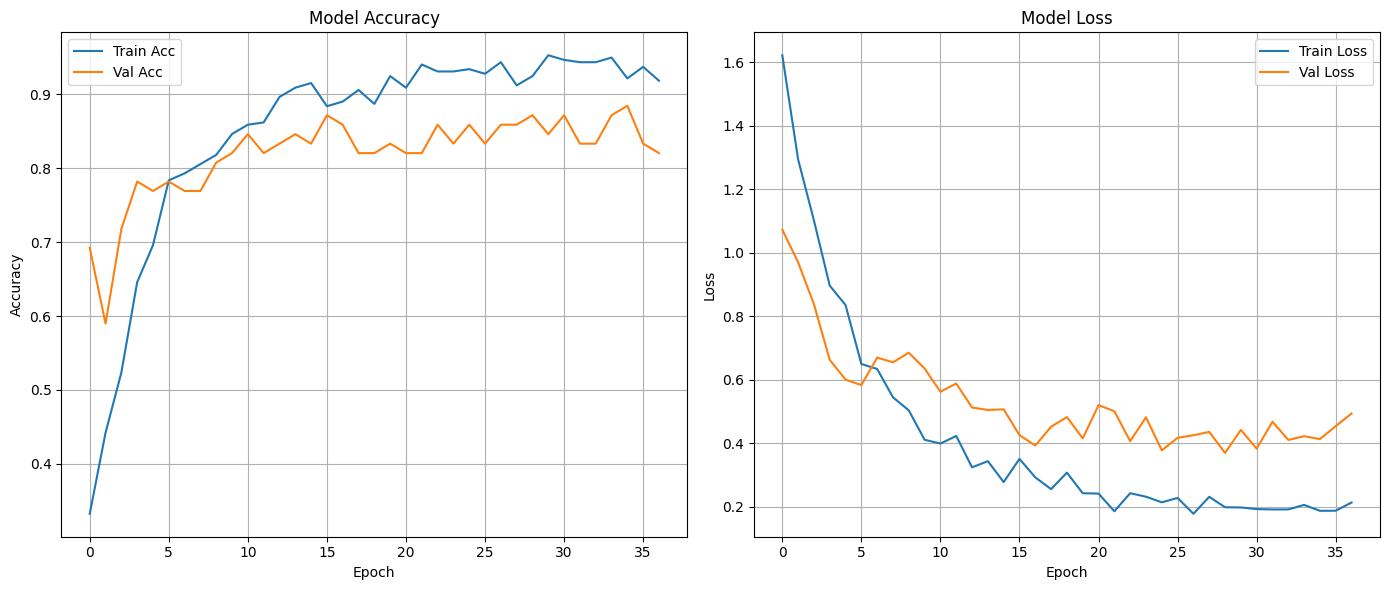


Model training complete and plots generated. The model is saved as 'DenseNet121_best_model'.


In [28]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


# 1. Build the model 
print("Building the model with DenseNet121...")

# Load the DenseNet121 base model
base_model = DenseNet121(
    weights='imagenet',        
    include_top=False,        
    input_shape=(224, 224, 3)  
)

# Unfreeze only the last 30 layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Create the full model 
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(64, activation='relu'), 
    Dropout(0.5), 
    Dense(4, activation='softmax')
])

# 2. Compile the model
print("Compiling the model...")
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Set up the callbacks
print("Setting up callbacks...")
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=8,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=4
    ),
    ModelCheckpoint(
        'DenseNet121_best_model.h5',
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )
]

# 4. Train the model
print("\nStarting model training...")
history = model.fit(
    train_generator,
    epochs=75,
    validation_data=validation_generator,
    callbacks=callbacks
)

# 5.  Plot training progress 
print("\nPlotting training results...")

plt.figure(figsize=(14, 6))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nModel training complete and plots generated. The model is saved as 'DenseNet121_best_model'.")

## Module 4: Face Detection and Prediction Pipeline

Loading face detection model...
Loading DermalScan model...


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


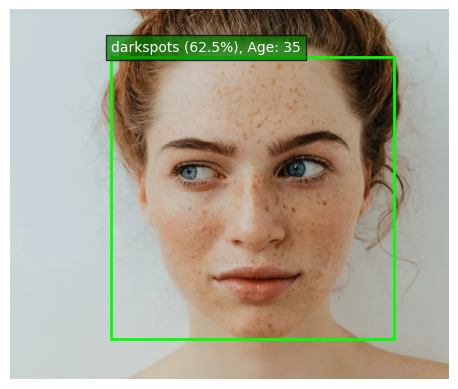

Processed: test_image1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


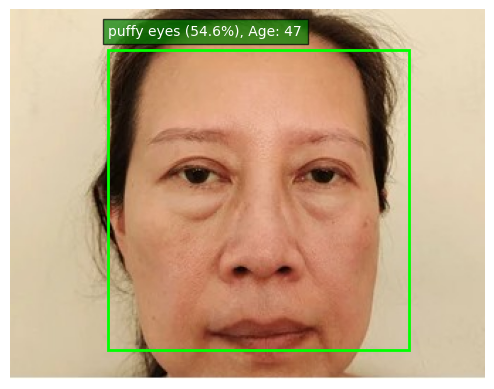

Processed: test_image2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


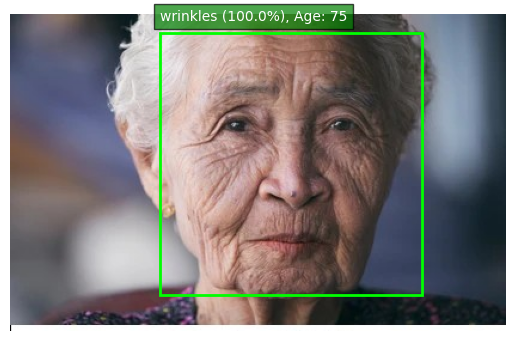

Processed: test_image3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


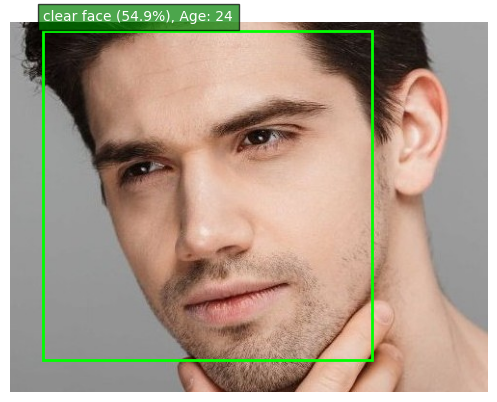

Processed: test_image4.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from random import randint

# Step 1: Paths to required files 
HAAR_CASCADE_PATH = 'haarcascade_frontalface_default.xml'
DERMALSCAN_MODEL_PATH = 'DenseNet121_best_model.h5'

# Testing multiple images
IMAGE_PATHS = ['test_image1.jpg', 'test_image2.jpg', 'test_image3.jpg', 'test_image4.jpg']

# Step 2: Load models 
print("Loading face detection model...")
face_cascade = cv2.CascadeClassifier(HAAR_CASCADE_PATH)

print("Loading DermalScan model...")
dermalscan_class_names = ['clear face', 'darkspots', 'puffy eyes', 'wrinkles']
dermalscan_model = load_model(DERMALSCAN_MODEL_PATH)


# Step 3: Prediction Pipeline 
def detect_and_predict(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read {image_path}")
        return

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print(f"No face detected in {image_path}")
        return

    # Plotting
    fig, ax = plt.subplots(1)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

    for (x, y, width, height) in faces:
        # Draw bounding box
        rect = plt.Rectangle((x, y), width, height, linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)

        # Facial Sign Prediction 
        face_for_dermalscan = cv2.resize(image[y:y + height, x:x + width], (224, 224))
        face_for_dermalscan = face_for_dermalscan / 255.0

        dermalscan_prediction = dermalscan_model.predict(np.expand_dims(face_for_dermalscan, axis=0))
        predicted_class_index = np.argmax(dermalscan_prediction)
        predicted_class = dermalscan_class_names[predicted_class_index]
        confidence_score = dermalscan_prediction[0][predicted_class_index] * 100

        # Estimated Age Logic 
        if predicted_class == "clear face":
            est_age = randint(18, 30)
        elif predicted_class == "darkspots":
            est_age = randint(30, 40)
        elif predicted_class == "puffy eyes":
            est_age = randint(40, 55)
        else:  # wrinkles
            est_age = randint(60, 75)

        # Display Text
        label_text = f"{predicted_class} ({confidence_score:.1f}%), Age: {est_age}"
        ax.text(
            x, y - 10, label_text,
            color='white', fontsize=10,
            bbox=dict(facecolor='green', alpha=0.7)
        )

    plt.show()
    print(f"Processed: {image_path}")


# Step 4: Run for Multiple Images
if __name__ == '__main__':
    for img_path in IMAGE_PATHS:
        detect_and_predict(img_path)
